In [1]:
#1
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Step: Step refers to each hour of one month: for example, each record with step = 1 means it happened
in the first hour on the first day of the experimental month, and each record with step = 744
occurred in the last hour of the month

In [2]:
#2
data = pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [3]:
#3
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
data.head(150)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0


In [3]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [16]:
data.isnull().sum().any()

False

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
data.shape

(6362620, 11)

In [ ]:
#data.step.hist(bins=20)
#data.type.hist(bins=20)
#data.amount.hist(bins=20)
#data.nameOrig.hist(bins=20)
#data.oldbalanceOrg.hist(bins=20)
#data.newbalanceOrig.hist(bins=20)
#data.nameDest.hist(bins=20)
#data.oldbalanceDest.hist(bins=20)
#data.newbalanceDest.hist(bins=20)
#data.isFraud.hist(bins=20)
#data.isFlaggedFraud.hist(bins=20)

In [10]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [32]:
count_classes=data.isFraud.value_counts()
count_classes

0    6354407
1       8213
Name: isFraud, dtype: int64

In [24]:
LABELS=['Normal','Fraud']

([<matplotlib.axis.XTick at 0x1fb296b5da0>,
 <a list of 2 Text xticklabel objects>)

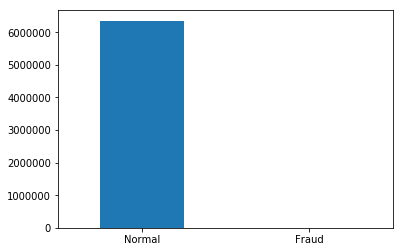

In [31]:
count_classes.plot(kind='bar', rot=0)
plt.xticks(range(2), LABELS)

In [4]:
#4
fraud = data.loc[data.isFraud==1]
normal = data.loc[data.isFraud==0]
#
#

In [7]:
type(fraud)

pandas.core.frame.DataFrame

In [4]:
print(fraud.shape)
print(normal.shape)

(8213, 11)
(6354407, 11)


In [43]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [44]:
normal.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [41]:
fraud.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [42]:
normal.amount.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

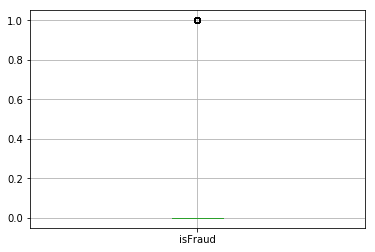

In [33]:
data.boxplot(column= 'isFraud')

We cannot remove the outliers from the data set as we have to detect and study the anomaly

# Univariate analysis

In [8]:
#fraud['type'].hist(bins = 50)

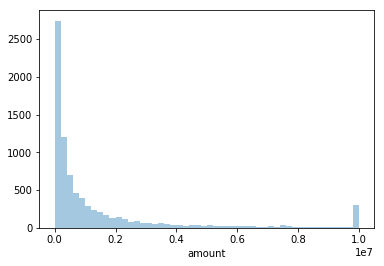

In [10]:
sns.distplot(fraud.amount, kde = False)

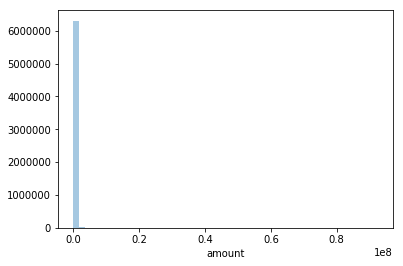

In [11]:
sns.distplot(normal.amount, kde = False)

In [4]:
co=fraud.type.value_counts()   #fraud data
co

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

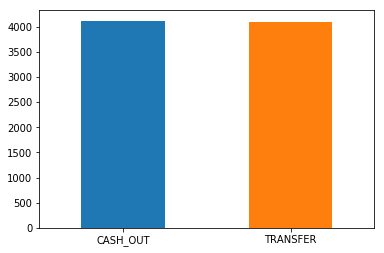

In [9]:
co.plot(kind='bar', rot=0)         

In [6]:
lo=normal.type.value_counts()   #legit data
lo

CASH_OUT    2233384
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     528812
DEBIT         41432
Name: type, dtype: int64

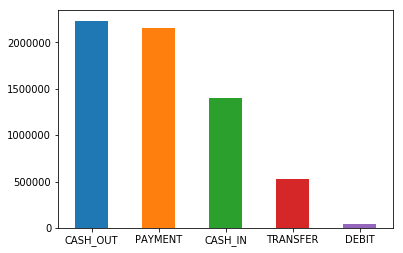

In [10]:
lo.plot(kind='bar', rot=0)

In [12]:
#data.head()
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


# Bivariate Analysis

Continous and Continous

# Pearson correlation

In [4]:
data_new = data.copy() #creating copy of the data set

In [5]:
data_new.drop('isFraud',inplace = True,axis = 1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


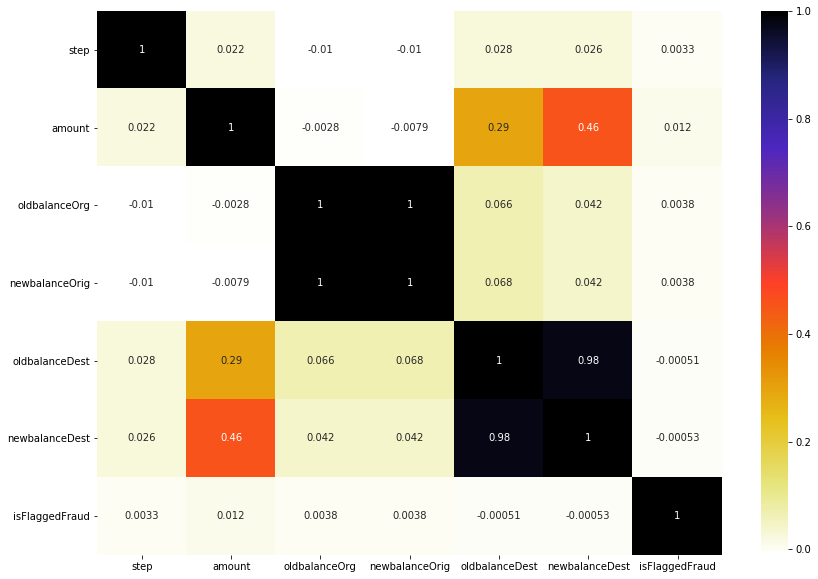

In [19]:
#import seaborn as sns
plt.figure(figsize=(14,10))
corr = data_new.corr()
sns.heatmap(corr, cmap=plt.cm.CMRmap_r, annot = True)

In [8]:
data_new.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,-0.000529
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,1.000000


In [20]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [26]:
corr_features = correlation(data_new, 0.9)
len(set(corr_features))

2

In [27]:
corr_features

{'newbalanceDest', 'newbalanceOrig'}

In [28]:
data_new1 = data.copy()

In [29]:
data_new1.drop('isFlaggedFraud', inplace = True,axis = 1)
data_new1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


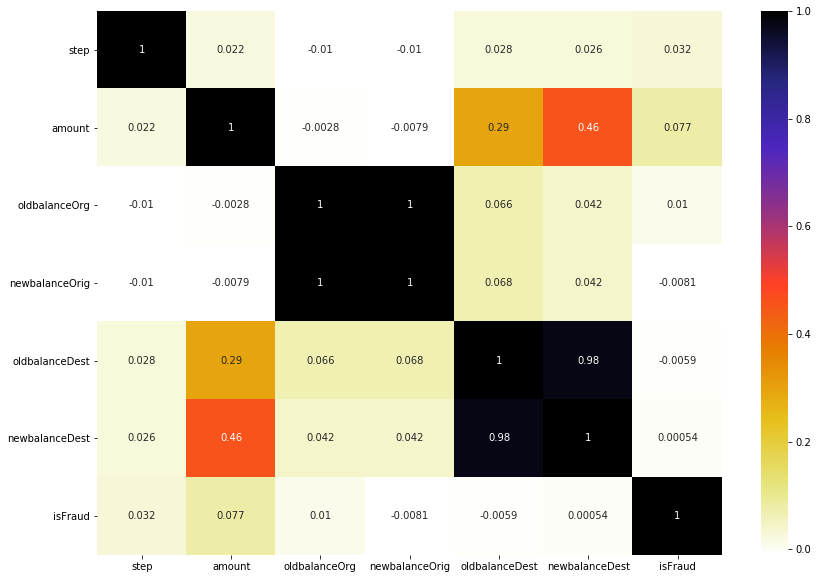

In [30]:
#corr = data_new1.corr()
#plt.figure(figsize=(14,10))
#sns.heatmap(corr, cmap=plt.cm.CMRmap_r, annot = True)

In [40]:
#corr_matrix = data_new1.corr()
#print(corr_matrix)

                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.022373      -0.010058       -0.010299   
amount          0.022373  1.000000      -0.002762       -0.007861   
oldbalanceOrg  -0.010058 -0.002762       1.000000        0.998803   
newbalanceOrig -0.010299 -0.007861       0.998803        1.000000   
oldbalanceDest  0.027665  0.294137       0.066243        0.067812   
newbalanceDest  0.025888  0.459304       0.042029        0.041837   
isFraud         0.031578  0.076688       0.010154       -0.008148   

                oldbalanceDest  newbalanceDest   isFraud  
step                  0.027665        0.025888  0.031578  
amount                0.294137        0.459304  0.076688  
oldbalanceOrg         0.066243        0.042029  0.010154  
newbalanceOrig        0.067812        0.041837 -0.008148  
oldbalanceDest        1.000000        0.976569 -0.005885  
newbalanceDest        0.976569        1.000000  0.000535  
isFraud              -0.005885    

In [9]:
data_new2 = data.copy()

In [10]:
data_new2.drop(['isFlaggedFraud','isFraud'], inplace = True,axis = 1)
data_new2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


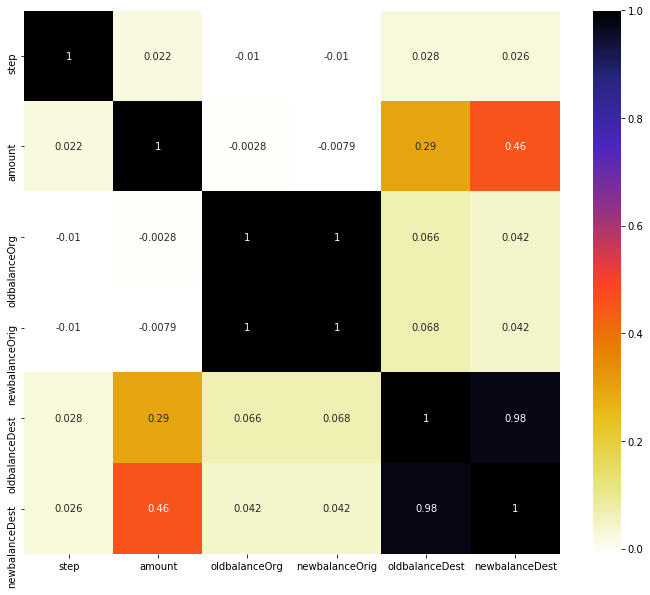

In [12]:
corr1 = data_new2.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr1, cmap=plt.cm.CMRmap_r, annot = True)

Continous and Categorical

In [49]:
 #data.boxplot(column = 'oldbalanceOrg', by = 'isFraud')   
    #from matplotlib.pyplot import figure
#figure(figsize=(13, 10))  ----> try

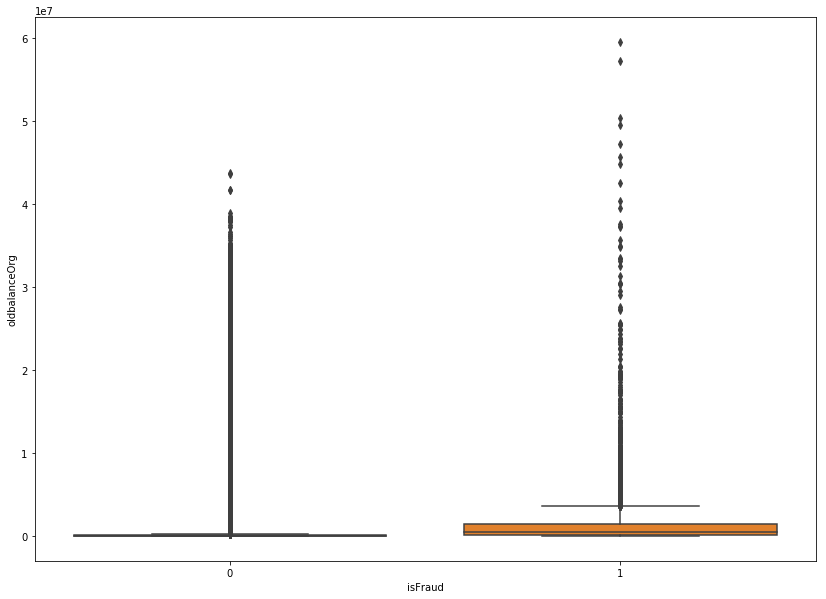

In [31]:
plt.figure(figsize=(14,10))
sns.boxplot(x="isFraud", y="oldbalanceOrg", data=data)

In [ ]:
#sns.barplot(x="isFraud", y="oldbalanceOrg", data=data)

# Finding Dependency 

In [4]:
import scipy.stats as stats

To check whether isFlaggedFraud have any dependencies

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


isFlaggedFraud vs type

isFlaggedFraud vs amount


In [5]:
d1 = pd.crosstab(data.isFlaggedFraud,data.type)
d1

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFlaggedFraud,,,,,
0,1399284,2237500,41432,2151495,532893
1,0,0,0,0,16


In [6]:
chi_square , p_value, degrees_of_freedom, expected_frequencies=stats.chi2_contingency(d1)

print(chi_square)  # Test Statistic
print ()
print(p_value)
print ()
print(degrees_of_freedom)
print ()
print(expected_frequencies)

175.0310288604575

8.699902785322113e-37

4

[[1.39928048e+06 2.23749437e+06 4.14318958e+04 2.15148959e+06
  5.32907660e+05]
 [3.51876177e+00 5.62661294e+00 1.04188526e-01 5.41033725e+00
  1.34009952e+00]]


In [7]:
alpha=0.05
p_value < alpha

True

isFlaggedFraud and type are dependent of each other

In [ ]:
isFlaggedFraud vs amount (categorical vs cont) anova test
Ho: they are independent
Ha: they are dependent

In [60]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [9]:
mod = ols('amount ~ isFlaggedFraud', data = data).fit() # continuous ~ categorical
aov = sm.stats.anova_lm(mod)
print (aov)

                       df        sum_sq       mean_sq           F  \
isFlaggedFraud        1.0  3.506993e+14  3.506993e+14  961.901242   
Residual        6362618.0  2.319745e+18  3.645897e+11         NaN   

                       PR(>F)  
isFlaggedFraud  3.560768e-211  
Residual                  NaN  


In [10]:

alpha = 0.05
pvalue =3.560768e-211
pvalue < alpha

True

amount and isFlaggedfraud are dependent of each other

In [ ]:
isFlaggedFraud vs nameOrig(categorical vs categorical) Chi sqr test
Ho: they are independent
Ha: they are dependent

In [ ]:
d3 = pd.crosstab(data.isFlaggedFraud,data.nameOrig)
d3

In [20]:
chi_square , p_value, degrees_of_freedom, expected_frequencies=stats.chi2_contingency(d3)

print(chi_square)  # Test Statistic
print ()
print(p_value)
print ()
print(degrees_of_freedom)
print ()
print(expected_frequencies)

175.0310288604575

8.699902785322113e-37

4

[[1.39928048e+06 2.23749437e+06 4.14318958e+04 2.15148959e+06
  5.32907660e+05]
 [3.51876177e+00 5.62661294e+00 1.04188526e-01 5.41033725e+00
  1.34009952e+00]]


In [21]:
alpha=0.05
p_value < alpha

True

In [18]:
fraud.count()

step              8213
type              8213
amount            8213
nameOrig          8213
oldbalanceOrg     8213
newbalanceOrig    8213
nameDest          8213
oldbalanceDest    8213
newbalanceDest    8213
isFraud           8213
isFlaggedFraud    8213
dtype: int64

nameOrig and isFraud related or not

isFraud vs type

isFraud vs amount


In [ ]:
isFraud vs type (categorical vs categorical) Chi sqr test
Ho: they are independent
Ha: they are dependent

In [13]:
d2 = pd.crosstab(data.isFraud,data.type)
d2

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,
0,1399284,2233384,41432,2151495,528812
1,0,4116,0,0,4097


In [14]:
chi_square , p_value, degrees_of_freedom, expected_frequencies=stats.chi2_contingency(d2)

print(chi_square)  # Test Statistic
print ()
print(p_value)
print ()
print(degrees_of_freedom)
print ()
print(expected_frequencies)

22082.53571319108

0.0

4

[[1.39747778e+06 2.23461179e+06 4.13785187e+04 2.14871781e+06
  5.32221110e+05]
 [1.80622440e+03 2.88821075e+03 5.34812728e+01 2.77719374e+03
  6.87889834e+02]]


In [15]:
alpha=0.05
p_value < alpha

True

isFraud and type are dependent

In [ ]:
isFraud vs amount (categorical vs cont) anova test
Ho: they are independent
Ha: they are dependent

In [16]:
mod = ols('amount ~ isFraud', data = data).fit() # continuous ~ categorical
aov = sm.stats.anova_lm(mod)
print (aov)

                 df        sum_sq       mean_sq             F  PR(>F)
isFraud         1.0  1.364475e+16  1.364475e+16  37640.657952     0.0
Residual  6362618.0  2.306451e+18  3.625003e+11           NaN     NaN


In [17]:
alpha = 0.05
pvalue =0.0
pvalue < alpha

True

isFraud and amount are dependent

In [ ]:
isFlaggedFraud and isFraud (categorical vs categorical) chi sqr test

Ho: they are independent
Ha: they are dependent    

In [3]:
d4 = pd.crosstab(data.isFlaggedFraud,data.isFraud)
d4

isFraud,0,1
isFlaggedFraud,,
0,6354407,8197
1,0,16


In [5]:
chi_square , p_value, degrees_of_freedom, expected_frequencies=stats.chi2_contingency(d4)

print(chi_square)  # Test Statistic
print ()
print(p_value)
print ()
print(degrees_of_freedom)
print ()
print(expected_frequencies)

11616.665816627796

0.0

1

[[6.35439102e+06 8.21297935e+03]
 [1.59793469e+01 2.06531272e-02]]


In [6]:
alpha=0.05
p_value < alpha

True

The status that the system identified for a
transaction — here an attempt to transfer more
than 200,000 (in local currency) in a single
transaction will be flagged as an illegal attempt (0
as normal and 1 as illegal attempt)

In [4]:
data.loc[(data.amount >= 200000), ['amount','isFlaggedFraud']]

,amount,isFlaggedFraud
15,229133.94,0
19,215310.30,0
24,311685.89,0
82,224606.64,0
84,379856.23,0
85,1505626.01,0
86,554026.99,0
88,761507.39,0
89,1429051.47,0
90,358831.92,0


In [5]:
data.loc[(data.amount >= 200000) & (data.isFlaggedFraud==0), ['amount','isFlaggedFraud']].count() 
#these many incorrect information were stated

amount            1673554
isFlaggedFraud    1673554
dtype: int64

isFlaggedFraud - boolean/binary - determines if transaction is flagged as fraudulent (encoded as 1) or not flagged at all (encoded as 0). An observation is flagged if the transaction is fraudulent and it involved a transfer of over 200,000 in the local currency.

In [7]:
data.head(150)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0


In [8]:
data.loc[(data.type == "PAYMENT")&(data.oldbalanceDest > 0), ['oldbalanceDest','newbalanceDest']]

,oldbalanceDest,newbalanceDest


*****

In [ ]:
#fraud = data.loc[data.isFraud==1]
#normal = data.loc[data.isFraud==0]

In [6]:
#normal.shape

(6354407, 11)

In [5]:
#5
normal = normal[(normal["type"] == "CASH_OUT")| (normal["type"] == "TRANSFER")]
data1 = data[(data["type"] == "CASH_OUT") | (data["type"] == "TRANSFER")]
#
#

In [8]:
data1.shape

(2770409, 11)

In [9]:
normal.shape

(2762196, 11)

In [10]:
data1.isFraud.value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

Most of the observations have errors in calculating the balances before and after the transaction

In [10]:
wrong_orig_bal = sum(data["oldbalanceOrg"] - data["amount"] != data["newbalanceOrig"])
wrong_dest_bal = sum(data["oldbalanceDest"] + data["amount"] != data["newbalanceDest"])
print("Percentage of observations with balance errors in the account giving money: ", 100*round(wrong_orig_bal/len(data),2))
print("Percentage of observations with balance errors in the account receiving money: ", 100*round(wrong_dest_bal/len(data),2))

Percentage of observations with balance errors in the account giving money:  85.0
Percentage of observations with balance errors in the account receiving money:  74.0


In [12]:
#num_wrong_bal = (data["oldbalanceOrg"] - data["amount"] != data["newbalanceOrig"]) | (data["oldbalanceDest"] + data["amount"] != data["newbalanceDest"])
#print("Percentage of observations with balance errors: ", 100*round(sum(num_wrong_bal)/len(data),2))

In [11]:
data1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [6]:
#6
data1["errorBalanceOrg"] = data1.newbalanceOrig + data1.amount - data1.oldbalanceOrg
data1["errorBalanceDest"] = data1.oldbalanceDest + data1.amount - data1.newbalanceDest
#
#

C:\Users\naiko\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\naiko\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
#7
data1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrg,errorBalanceDest
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,0.00,181.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,0.00,21363.0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,213808.94,182703.5
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,214605.30,237735.3
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,300850.89,-2401220.0


In [18]:
#data2=data1.copy()

In [19]:
#data2.drop(['newbalanceDest', 'newbalanceOrig','isFraud','isFlaggedFraud'], inplace=True, axis=1)

In [21]:
#corr5 = data2.corr()
#plt.figure(figsize=(14,10))
#sns.heatmap(corr5, cmap=plt.cm.CMRmap_r, annot = True)

In [13]:
data3=data.copy()

In [14]:
data3.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [15]:
data4 = data3[(data["type"] == "CASH_OUT") | (data3["type"] == "TRANSFER")]
data4.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [16]:
data4.loc[(data4.amount >= 200000) & (data4.isFlaggedFraud==0), ['isFlaggedFraud']].count()


isFlaggedFraud    1197653
dtype: int64

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [8]:
#8
data1.drop('isFlaggedFraud', inplace=True, axis=1) 
#
#dropped isFlaggedFraud two dependent variable were dependent based on Chisqr test and isFlaggedFraud had many incorrect values
#these many incorrect information were stated 1197669 should be isFlaggedFraud 1

C:\Users\naiko\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [9]:
#9
data1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrg,errorBalanceDest
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0.00,181.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0.00,21363.0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,213808.94,182703.5
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,214605.30,237735.3
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,300850.89,-2401220.0


In [10]:
#10
data1.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'errorBalanceOrg', 'errorBalanceDest'],
      dtype='object')

In [11]:
data1.shape

(2770409, 12)

In [21]:
fraud1 = data1[data1["isFraud"] == 1]
legit1 = data1[data1["isFraud"] == 0]

In [22]:
fraud1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrg,errorBalanceDest
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0.0,181.0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0.0,21363.0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0.0,2806.0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0.0,29008.0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0.0,20128.0


In [23]:
legit1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrg,errorBalanceDest
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,213808.94,182703.50
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.0,0.00,0,214605.30,237735.30
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.0,2719172.89,0,300850.89,-2401220.00
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0,83569.30,396799.55
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,55011.88,63100.72


In [62]:
#mod = ols('amount ~ nameOrig', data = data1).fit() # continuous ~ categorical
#aov = sm.stats.anova_lm(mod)
#print (aov)

In [24]:
legit1.shape

(2762196, 12)

In [25]:
fraud1.shape

(8213, 12)

In [26]:
fraud1.nameOrig.nunique()

8213

In [27]:
fraud1.nameDest.nunique()

8169

In [11]:
#11
data1.drop(['nameOrig','nameDest'],axis=1,inplace=True)

In [12]:
#12
data1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrg,errorBalanceDest
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1,0.00,181.0
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,0.00,21363.0
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0


In [82]:
#data1.shape

(2770409, 10)

In [30]:
data1.shape

(2770409, 10)

In [ ]:
###########

In [13]:
data1 = pd.get_dummies(data1,prefix=['type'])

In [14]:
pd.DataFrame.head(data1)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrg,errorBalanceDest,type_CASH_OUT,type_TRANSFER
2,1,181.00,181.0,0.0,0.0,0.00,1,0.00,181.0,0,1
3,1,181.00,181.0,0.0,21182.0,0.00,1,0.00,21363.0,1,0
15,1,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5,1,0
19,1,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3,0,1
24,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0,0,1


In [15]:
data2 = data1.copy()

In [16]:
Y=data2.isFraud
#type(Y)

In [38]:
#data2.head()
#data1.head()

In [17]:
from sklearn.preprocessing import StandardScaler
independent_scalar=StandardScaler()
data2[['step','amount', 'oldbalanceOrg','newbalanceOrig', 'oldbalanceDest','newbalanceDest','errorBalanceOrg','errorBalanceDest']]= independent_scalar.fit_transform(data2[['step','amount', 'oldbalanceOrg','newbalanceOrig', 'oldbalanceDest','newbalanceDest','errorBalanceOrg','errorBalanceDest']])
data2

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrg,errorBalanceDest,type_CASH_OUT,type_TRANSFER
2,-1.701805,-0.357467,-0.188847,-0.106389,-0.403155,-0.438259,1,-0.326719,0.048575,0,1
3,-1.701805,-0.357467,-0.188847,-0.106389,-0.398142,-0.438259,1,-0.326719,0.084266,1,0
15,-1.701805,-0.099576,-0.128591,-0.106389,-0.401952,-0.427245,0,-0.082456,0.356121,1,0
19,-1.701805,-0.115146,-0.186762,-0.106389,-0.397848,-0.438259,0,-0.081547,0.448849,0,1
24,-1.701805,-0.006590,-0.146456,-0.106389,-0.401672,0.143134,0,0.016983,-3.997735,0,1
42,-1.701805,-0.233300,-0.082752,-0.106389,-0.334809,-0.437743,0,-0.231247,0.716869,1,0
47,-1.701805,-0.293518,-0.181840,-0.106389,-0.386529,-0.424553,0,-0.263872,0.154593,1,0
48,-1.701805,-0.351648,-0.189568,-0.106389,-0.248705,0.941567,0,-0.320611,-9.716935,1,0
51,-1.701805,-0.331469,-0.108352,-0.106389,-0.397063,-0.438259,0,-0.323464,0.130839,1,0
58,-1.701805,-0.287146,0.125220,0.002719,-0.403033,-0.436467,0,-0.326719,0.140513,0,1


In [18]:
data2.drop('isFraud',inplace=True,axis=1)

In [19]:
data2.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorBalanceOrg,errorBalanceDest,type_CASH_OUT,type_TRANSFER
2,-1.701805,-0.357467,-0.188847,-0.106389,-0.403155,-0.438259,-0.326719,0.048575,0,1
3,-1.701805,-0.357467,-0.188847,-0.106389,-0.398142,-0.438259,-0.326719,0.084266,1,0
15,-1.701805,-0.099576,-0.128591,-0.106389,-0.401952,-0.427245,-0.082456,0.356121,1,0
19,-1.701805,-0.115146,-0.186762,-0.106389,-0.397848,-0.438259,-0.081547,0.448849,0,1
24,-1.701805,-0.006590,-0.146456,-0.106389,-0.401672,0.143134,0.016983,-3.997735,0,1


In [20]:
X=data2.copy()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42,stratify=Y) 
#stratify y will give you balance sample like if x_train have more sample from one class and less from other not good 
#for predicting

In [23]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(2216327, 10)
(554082, 10)
(2216327,)
(554082,)


In [24]:
y_train.value_counts()

0    2209757
1       6570
Name: isFraud, dtype: int64

In [25]:
y_test.value_counts()

0    552439
1      1643
Name: isFraud, dtype: int64

# Logistic Regression Algorithm

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, roc_auc_score

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = model.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9983468150923509

In [30]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[552357     82]
 [   834    809]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552439
           1       0.91      0.49      0.64      1643

    accuracy                           1.00    554082
   macro avg       0.95      0.75      0.82    554082
weighted avg       1.00      1.00      1.00    554082



In [99]:
#sns.heatmap(classification_report(y_test,y_pred),cmap=plt.cm.CMRmap_r, annot = True)

In [63]:
y_pred_train = model.predict(X_train)

In [64]:
print("Testing accuracy",accuracy_score(y_test,y_pred))
print("Training accuracy",accuracy_score(y_train,y_pred_train))

Testing accuracy 0.9983468150923509
Training accuracy 0.9983283152711672


In [66]:
#print("F1_score",f1_score(y_pred,y_test))

In [38]:
auc = roc_auc_score(y_test, y_pred)
auc

0.746121766619186

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

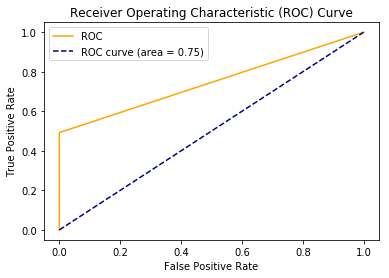

In [44]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [42]:
#thresholds

In [61]:
w = {0:1, 1:10}

In [63]:
model = LogisticRegression(class_weight=w)
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 10})

In [64]:
y_pred = model.predict(X_test)

In [65]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9974065210564501

In [66]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[551599    840]
 [   597   1046]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552439
           1       0.55      0.64      0.59      1643

    accuracy                           1.00    554082
   macro avg       0.78      0.82      0.80    554082
weighted avg       1.00      1.00      1.00    554082



In [67]:
auc = roc_auc_score(y_test, y_pred)
auc

0.8175598811400264

# Checking the acuracy if everything is 0 to check our model is behaving biased

In [37]:
#Checking the acuracy if everything is 0 to check our model is behaving biased
accuracy_score(y_test,[0 for i in range(len(X_test))])


0.9970347349309308

# XG Boosting Algorithm

In [24]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(2216327, 10)
(554082, 10)
(2216327,)
(554082,)


In [37]:
#from sklearn.svm import SVC


In [34]:
#model = SVC()

In [ ]:
#model.fit(X_train, y_train)

In [ ]:
#svm = SVC(kernel='rbf', random_state=1, gamma=1, C=100.0)
#svm.fit(X_train, y_train)

In [29]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, roc_auc_score

In [27]:
model = XGBClassifier()

In [28]:
model.fit(X_train, y_train)

XGBClassifier()

In [29]:
y_predict = model.predict(X_test)

print (accuracy_score(y_test, y_predict))

0.9999891712778975


In [30]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[552439      0]
 [     6   1637]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552439
           1       1.00      1.00      1.00      1643

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082



In [31]:
auc = roc_auc_score(y_test, y_predict)
auc

0.9981740718198417

# Random Forest Model

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 25, # number of trees
                               random_state = 1) # all the columns

model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=25, random_state=1)

In [32]:
y_predict = model.predict(X_test)

print (accuracy_score(y_test, y_predict))

0.9999891712778975


In [35]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[552439      0]
 [     6   1637]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552439
           1       1.00      1.00      1.00      1643

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082



In [36]:
auc = roc_auc_score(y_test, y_predict)
auc

0.9981740718198417

In [27]:
y_pred_train = model.predict(X_train)

In [30]:
print("Training accuracy",accuracy_score(y_train,y_pred_train))

Training accuracy 0.9999995488030422


In [59]:
w = {0:1, 1:10}

In [60]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 25, # number of trees
                               random_state = 1,
                              class_weight= w) # all the columns

model.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 1, 1: 10}, n_estimators=25,
                       random_state=1)

In [61]:
y_predict = model.predict(X_test)

print (accuracy_score(y_test, y_predict))

0.9999909760649146


In [62]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[552439      0]
 [     5   1638]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552439
           1       1.00      1.00      1.00      1643

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082



# HyperParameter Tuning

In [ ]:
w = [ {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000} ]

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(LogisticRegression(solver='liblinear',multi_class='auto'), {
    'C': [1,10,20],
    "class_weight": w
}, cv=5, return_train_score=False)
clf.fit(X_train, y_train)
y_predict
clf.cv_results_

In [ ]:
df = pd.DataFrame(clf.cv_results_)
df

In [ ]:
clf.best_params_

In [ ]:
clf.best_score_

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, roc_auc_score

In [69]:
w = [ {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000} ]

In [28]:
hyperparam_grid = {"class_weight": w
                   ,"penalty": ["l1", "l2"]
                   ,"fit_intercept": [True, False]  }

In [29]:
lg4 = LogisticRegression(random_state=13)

In [30]:
grid = GridSearchCV(lg4,hyperparam_grid,scoring="roc_auc", cv=5, n_jobs=-1, refit=True)

In [ ]:
grid.fit(X, Y)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

In [ ]:
lg4 = LogisticRegression(random_state=13,C=13.0,fit_intercept=True, penalty='l2',class_weight={0: 1, 1: 100} )

In [ ]:
lg4.fit(X_train,y_train)

In [ ]:
y_pred = lg4.predict(X_test)
print (accuracy_score(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
auc = roc_auc_score(y_test, y_predict)
auc

In [68]:

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rs= RandomizedSearchCV(lg4,hyperparam_grid,scoring="roc_auc", cv=5, n_jobs=-1, refit=True)

In [ ]:
rs.fit(X, Y)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')